# Dirichlet分布


1275
1275


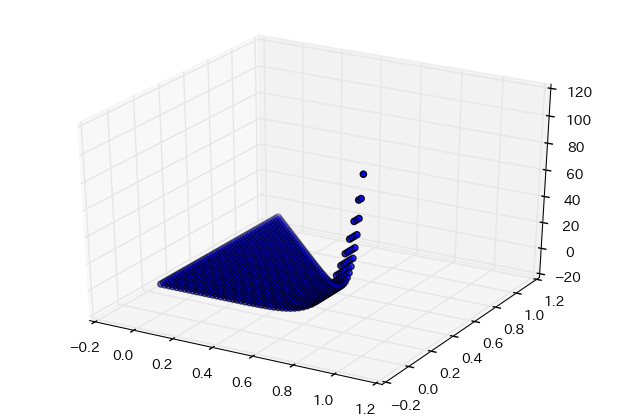

In [131]:
import sys
from math import *
import matplotlib.tri as tri
from mpl_toolkits.mplot3d import Axes3D


class Dir(object):
    def __init__(self, params):
        self.params_ = np.array(params)
        self.coef_ = gamma(self.params_.sum()) / np.prod(np.array([gamma(param)
                                                                 for param in self.params_]))
        
    def pdf(self, X):
        ans = []
        for x in X:
            ans.append([self.coef_ *\
                       np.prod([xx ** (param - 1) for xx, param in zip(x, self.params_)])])
        return np.array(ans)


x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)

X, Y = np.meshgrid(x,y)

bad = np.where(X + Y > 1.0)
X[bad] = -1
Y[bad] = -1

XX = np.array([np.delete(xx, np.where(xx < 0)) for xx in X])
YY = np.array([np.delete(yy, np.where(yy < 0)) for yy in Y])

ZZ = 1 - (XX + YY)

fig = plt.figure(figsize=(8, 4))

inputs = []
for i in range(len(XX)):
    xx = XX[i]
    for j in range(len(xx)):
        inputs.append([XX[i][j], YY[i][j], ZZ[i][j]])

dir_distrb = Dir(params=[10, 1, 1])
preds = dir_distrb.pdf(inputs)

xs = []
for xx in XX:
    xs = np.hstack((xs, xx))
ys = []
for yy in YY:
    ys = np.hstack((ys, yy))
print(len(xs))
print(len(ys))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, preds, c='b')
plt.show()


matplotlib、3次元の描画めっちゃめんどくさい...